In [5]:
pip install yfinance

  Using cached yfinance-0.2.42-py2.py3-none-any.whl (84 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached lxml-5.3.0-cp311-cp311-win_amd64.whl (3.8 MB)
  Using cached frozendict-2.4.4-py311-none-any.whl (16 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\sample.exe' -> 'c:\\Python311\\Scripts\\sample.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import yfinance as yf
import pandas as pd
import os

# Fetching data for BankNifty (^NSEBANK)
if os.path.exists("banknifty.csv"):
    banknifty = pd.read_csv("banknifty.csv", index_col=0)
else:
    banknifty = yf.Ticker("^NSEBANK")
    banknifty = banknifty.history(period="max")
    banknifty.to_csv("banknifty.csv")

# Convert the index to datetime
banknifty.index = pd.to_datetime(banknifty.index)

# Display the data
banknifty


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,6897.919911,6977.119187,6842.920550,6897.020020,0,0.0,0.0
2007-09-18 00:00:00+05:30,6921.069480,7078.867940,6883.520112,7059.567871,0,0.0,0.0
2007-09-19 00:00:00+05:30,7110.917439,7419.263957,7110.917439,7401.764160,0,0.0,0.0
2007-09-20 00:00:00+05:30,7404.864086,7462.813119,7343.514701,7390.063965,0,0.0,0.0
2007-09-21 00:00:00+05:30,7378.213894,7506.262696,7367.064122,7464.413086,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-19 00:00:00+05:30,50683.550781,50728.250000,50283.550781,50368.351562,115300,0.0,0.0
2024-08-20 00:00:00+05:30,50417.250000,51025.601562,50398.601562,50803.148438,144200,0.0,0.0
2024-08-21 00:00:00+05:30,50666.648438,50772.449219,50333.351562,50685.550781,180800,0.0,0.0


<Axes: xlabel='Date'>

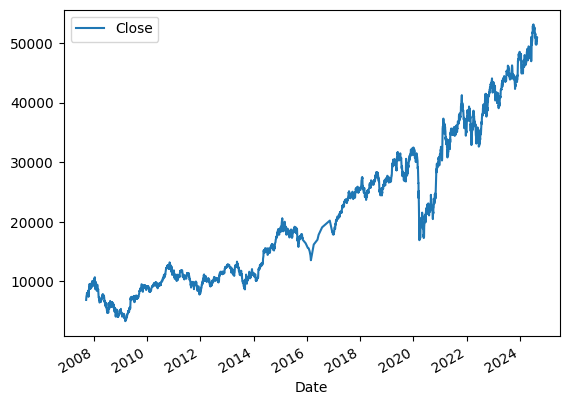

In [7]:
banknifty.plot.line(y="Close", use_index=True)


In [8]:
del banknifty["Dividends"]
del banknifty["Stock Splits"]

Mean Squared Error: 27702193.812099278
R-squared: -0.10719456313799824


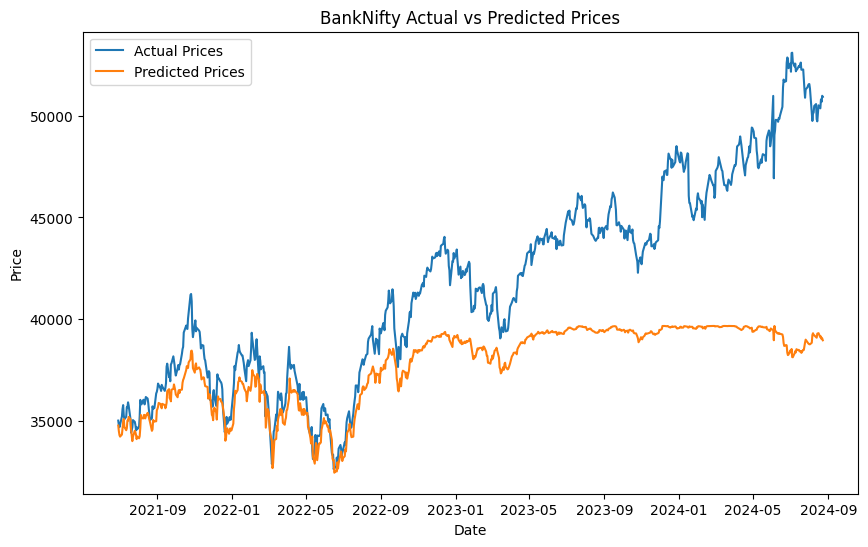

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Feature selection and target variable
# We'll use the 'Close' prices as the target variable and the previous day's prices as features.
banknifty['Previous Close'] = banknifty['Close'].shift(1)
banknifty = banknifty.dropna()

# Features (X) and target (y)
X = banknifty[['Previous Close']]
y = banknifty['Close']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model training
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train_scaled, y_train)

# Step 5: Prediction
y_pred = svr.predict(X_test_scaled)

# Step 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Optional: Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.title('BankNifty Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Random Forest Regressor - Mean Squared Error: 46457574.4092924
Random Forest Regressor - R-squared: -0.8568050657447044


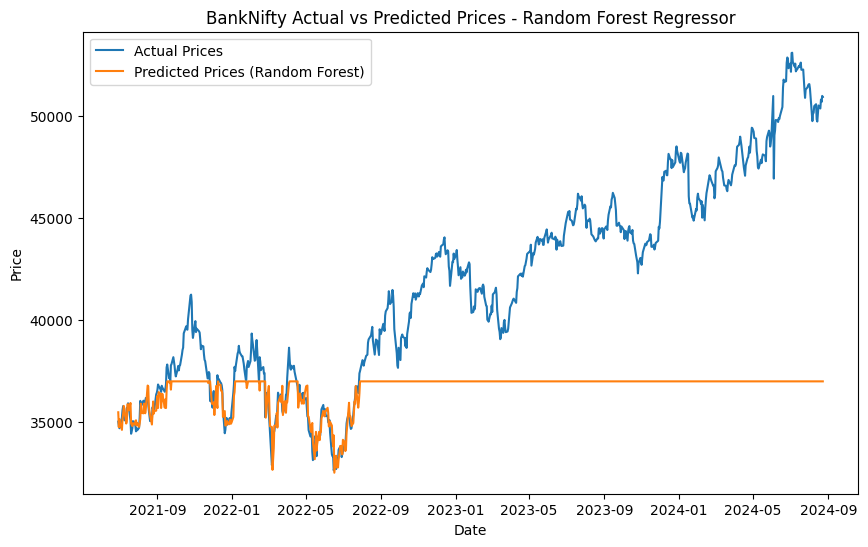

In [14]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor - Mean Squared Error: {mse_rf}')
print(f'Random Forest Regressor - R-squared: {r2_rf}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)')
plt.title('BankNifty Actual vs Predicted Prices - Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Linear Regression - Mean Squared Error: 211677.76972577022
Linear Regression - R-squared: 0.9915397142418668


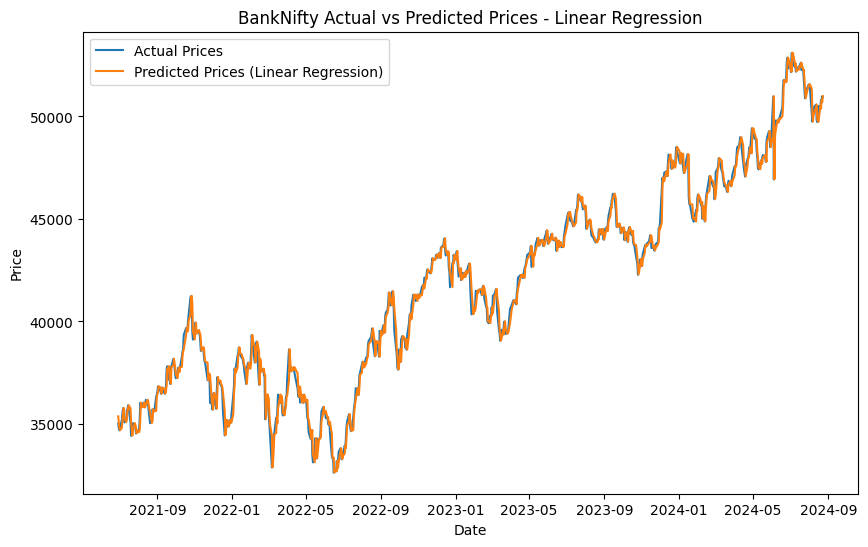

In [15]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - Mean Squared Error: {mse_lr}')
print(f'Linear Regression - R-squared: {r2_lr}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred_lr, label='Predicted Prices (Linear Regression)')
plt.title('BankNifty Actual vs Predicted Prices - Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Gradient Boosting Regressor - Mean Squared Error: 46721452.64013743
Gradient Boosting Regressor - R-squared: -0.8673516868716737


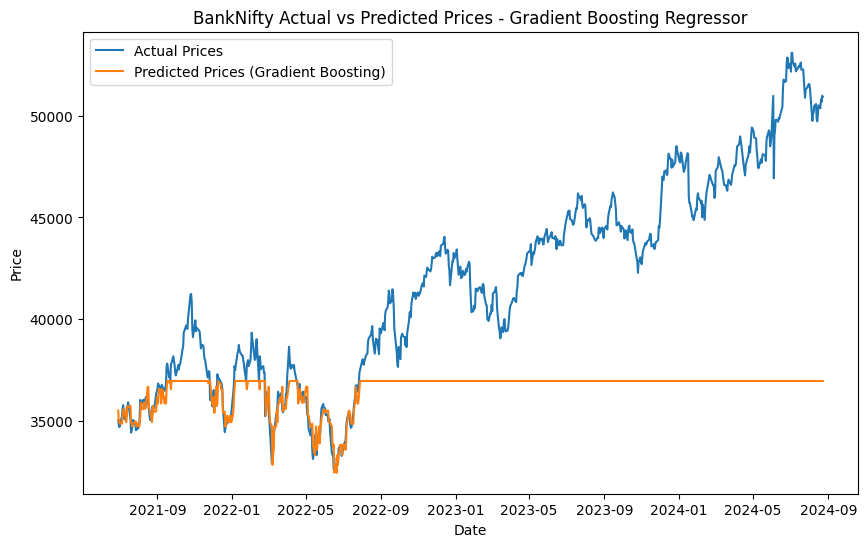

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Regressor - Mean Squared Error: {mse_gbr}')
print(f'Gradient Boosting Regressor - R-squared: {r2_gbr}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred_gbr, label='Predicted Prices (Gradient Boosting)')
plt.title('BankNifty Actual vs Predicted Prices - Gradient Boosting Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [20]:
# Moving Averages
banknifty.loc[:, 'MA_5'] = banknifty['Close'].rolling(window=5).mean()
banknifty.loc[:, 'MA_10'] = banknifty['Close'].rolling(window=10).mean()

# Exponential Moving Averages
banknifty.loc[:, 'EMA_5'] = banknifty['Close'].ewm(span=5, adjust=False).mean()
banknifty.loc[:, 'EMA_10'] = banknifty['Close'].ewm(span=10, adjust=False).mean()

# Rolling Standard Deviation (Volatility)
banknifty.loc[:, 'Volatility_5'] = banknifty['Close'].rolling(window=5).std()

# Relative Strength Index (RSI)
delta = banknifty['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
banknifty.loc[:, 'RSI_14'] = 100 - (100 / (1 + rs))

# Daily Return
banknifty.loc[:, 'Daily_Return'] = banknifty['Close'].pct_change()

# Lag Features
banknifty.loc[:, 'Lag_1'] = banknifty['Close'].shift(1)
banknifty.loc[:, 'Lag_3'] = banknifty['Close'].shift(3)
banknifty.loc[:, 'Lag_7'] = banknifty['Close'].shift(7)

# Dropping NaN values after feature engineering
banknifty = banknifty.dropna()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Feature Selection
features = ['MA_5', 'MA_10', 'EMA_5', 'EMA_10', 'Volatility_5', 'RSI_14', 'Daily_Return', 'Lag_1', 'Lag_3', 'Lag_7']
X = banknifty[features]
y = banknifty['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and evaluation

# 1. Support Vector Regressor (SVR)
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR - Mean Squared Error: {mse_svr}')
print(f'SVR - R-squared: {r2_svr}')

# 2. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor - Mean Squared Error: {mse_rf}')
print(f'Random Forest Regressor - R-squared: {r2_rf}')

# 3. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - Mean Squared Error: {mse_lr}')
print(f'Linear Regression - R-squared: {r2_lr}')

# 4. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Regressor - Mean Squared Error: {mse_gbr}')
print(f'Gradient Boosting Regressor - R-squared: {r2_gbr}')


SVR - Mean Squared Error: 226066543.72891432
SVR - R-squared: -8.092540523374531
Random Forest Regressor - Mean Squared Error: 53767530.900210015
Random Forest Regressor - R-squared: -1.162564373692518
Linear Regression - Mean Squared Error: 7580.192460289419
Linear Regression - R-squared: 0.9996951198262986
Gradient Boosting Regressor - Mean Squared Error: 54317705.84147863
Gradient Boosting Regressor - R-squared: -1.1846927606086677


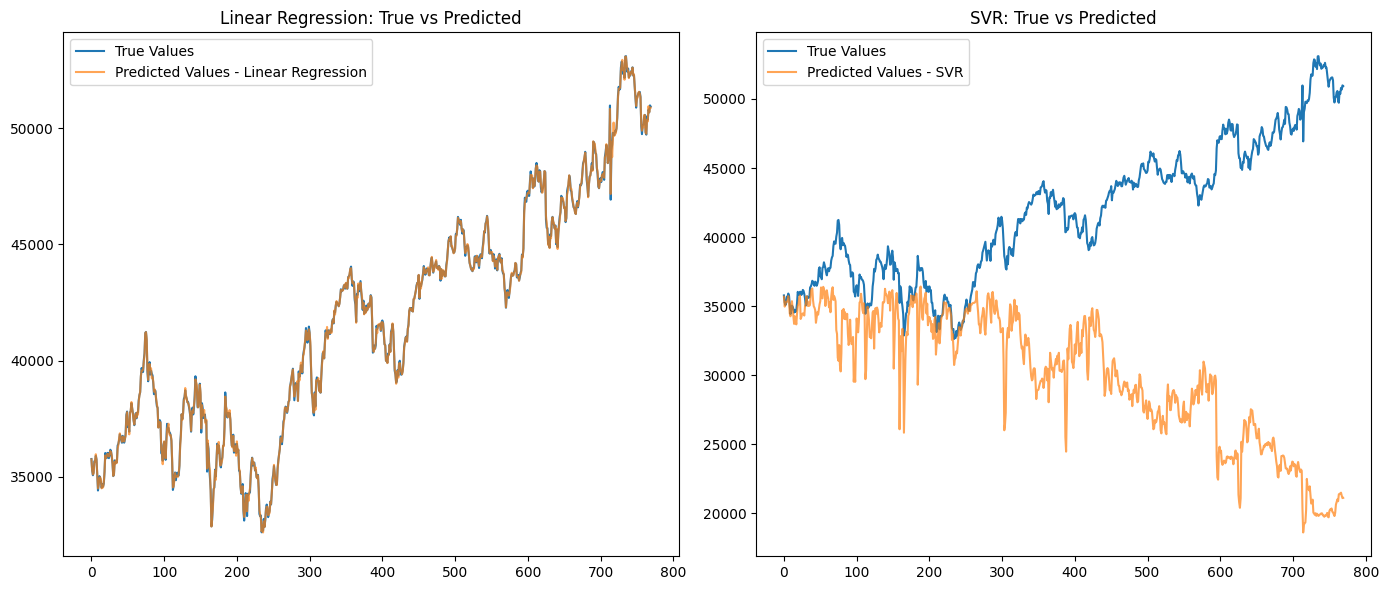

In [22]:
import matplotlib.pyplot as plt

# Plotting the true values against the predicted values for Linear Regression and SVR

# Linear Regression
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred_lr, label='Predicted Values - Linear Regression', alpha=0.7)
plt.title('Linear Regression: True vs Predicted')
plt.legend()

# SVR
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred_svr, label='Predicted Values - SVR', alpha=0.7)
plt.title('SVR: True vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()
